# Keypoints and Bounding box

## Imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from copy import copy

import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset
from helpers import imshow, world_to_img

## Creation of a Dataset container

In [5]:
DATASET_PATH= './Data'
dp = Dataset(path=DATASET_PATH)[0]

## Keypoints and bounding box visualization

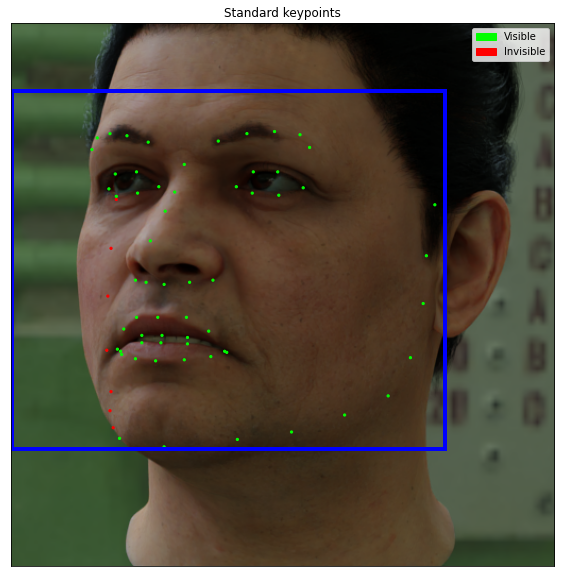

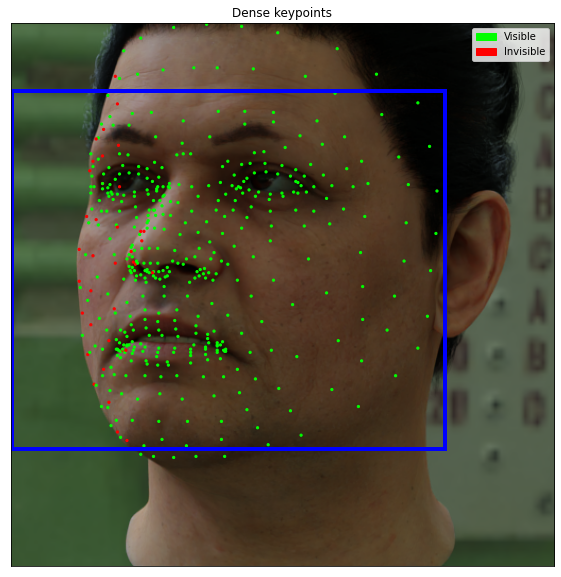

In [17]:
def show_keypoints(img, keypoints, visible, title, convention='ij'):
    # Convention can be either 'ij' (pixel coordinates) or 'xy' (cartesian coordinates)
    color = np.where(visible[:, np.newaxis], [[0, 1, 0]], [[1, 0, 0]])
    imshow(img)
    if convention == 'ij':
        plt.scatter(keypoints[:, 1], keypoints[:, 0], s=5, c=color)
    elif convention == 'xy':
        plt.scatter(keypoints[:, 0], keypoints[:, 1], s=5, c=color)


    pop_invisible = Patch(color=[1, 0, 0], label='Invisible')
    pop_visible = Patch(color=[0, 1, 0], label='Visible')

    plt.legend(handles=[pop_visible, pop_invisible])
    plt.title(title)

rect1 = Rectangle((dp.min_x, dp.min_y), dp.max_x - dp.min_x, dp.max_y - dp.min_y, linewidth=4, edgecolor='b', facecolor='none')
rect2 = copy(rect1)
show_keypoints(img=dp.rgb_img, keypoints=dp.keypoints_2d_coordinates, visible=dp.is_visible, title='Standard keypoints')
plt.gca().add_patch(rect1)
show_keypoints(img=dp.rgb_img, keypoints=dp.dense_keypoints_2d_coordinates, visible=dp.dense_is_visible, title='Dense keypoints')
plt.gca().add_patch(rect2)

## 3D keypoints projection in camera frame

3D keypoints are in world coordinates

In [ ]:
dp.keypoints_3d_coordinates[:5]

array([[-0.07168508,  0.07488196,  0.16107631],
       [-0.07388608,  0.07041365,  0.13987887],
       [-0.07529555,  0.06884521,  0.11945391],
       [-0.07548776,  0.06074718,  0.09626269],
       [-0.07242179,  0.04111835,  0.07942045]])

Let's use the camera matrices to convert them to image coordinates

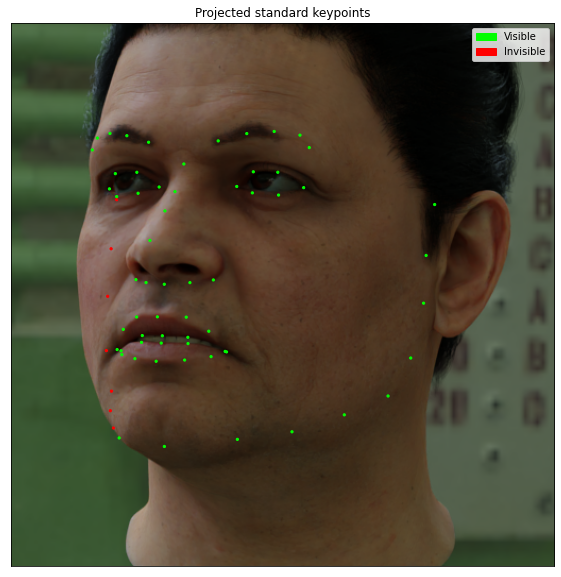

In [ ]:
keypoints_2d = world_to_img(dp.keypoints_3d_coordinates, dp.intrinsic_matrix, dp.extrinsic_matrix)
show_keypoints(img=dp.rgb_img, keypoints=keypoints_2d, visible=dp.is_visible, title='Projected standard keypoints', convention='xy')